<a href="https://colab.research.google.com/github/venkat52/my_colab_notes/blob/main/Copy_of_Lab3_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data augmentation

FMML Module 1, Lab 3<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 18 October 2021 <br>

 In this lab, we will see how augmentation of data samples help in improving the machine learning performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseedS
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

In [2]:
rng.random(4)

array([0.77395605, 0.43887844, 0.85859792, 0.69736803])

In [3]:
mnist.load_data()[0]

11501568/11490434 [==============================] - 0s 0us/step


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

Augmentation is useful when we have less training data available. Augmentation allows us to 'create' a larger dataset programatically. 

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation. 

In [4]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels


Let us borrow a few functions from the previous labs:

In [5]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.<br>

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [8]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


In [ ]:
def div(a,b,c):
  print(a.shape,b.shape,c.shape)
  l=[]
  for x in c:
    p=x-a[0]
    k=0
    p=abs(p.sum())
    j=0
    for y in a:
      if abs((x-y).sum())<p:
        p=abs((x-y).sum())
        k=j
      j+=1
    l.append(train_y[k])
  return l


div(train_X, train_y, train_X)

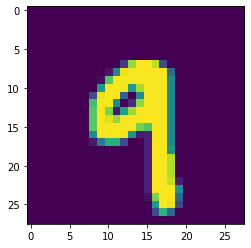

In [ ]:
plt.imshow(train_X[-4])

In [ ]:
a=np.arange(16).reshape(1,2,8)
b=np.arange(16).reshape(1,2,8)
print(a.sum())
a=[1,2,3,4]
b=[1,2,3,4]
# a/b
for x in train_X:
  print(x.shape)

In [ ]:
train_X[0].shape

(28, 28)

Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits. 

### Augmentation 1: rotation

Let us try rotating the image a little. We will use skimage library for this. 

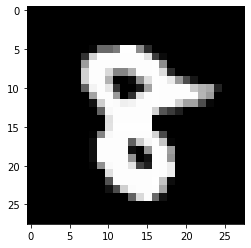

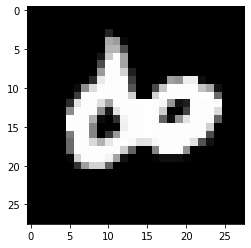

In [9]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
plt.imshow(rotate(train_X[2],90), cmap='gray')

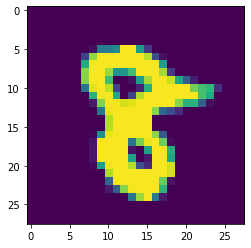

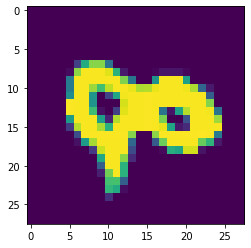

In [ ]:
a,b =train_X[2].shape
z=np.zeros((b,a))
for x in range(28):
  for y in range(28):
    z[x,y]=train_X[2][y][x]
plt.imshow(train_X[2])
plt.show()
plt.imshow(z)



After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [36]:
def augRotate(sample, angleconstraint):
  # print(sample.shape,len(sample))
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

In [11]:
def rotates(k,angle):
  s=k.copy()
  # print(s)
  # return 0
  if angle==0:
    return s
  print(len(s.shape))
  ran = rng.random(len(s))
  ran = (0.5-ran)*angle
  for x in range(len(s)):
    s[x] = rotate(s[x],ran[x])
  # d=s.copy()
  return s


In [ ]:
a=3
b=a
a=4
a,b

(4, 3)

In [ ]:
a=[1,2,3,4]
b=a
b.append(99)
a,b

([1, 2, 3, 4, 99], [1, 2, 3, 4, 99])

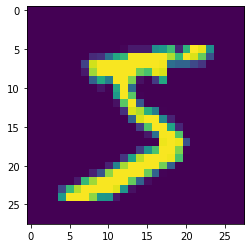

(50, 28, 28) 50


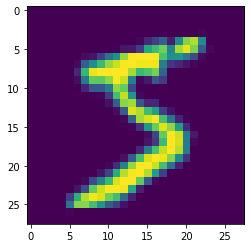

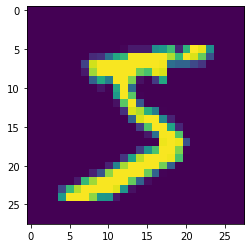

In [18]:
plt.imshow(train_X[0])
plt.show()
plt.imshow(augRotate(train_X,120)[0])
plt.show()
plt.imshow(train_X[0])
# len(train_X.shape)

In [19]:
def aas(x):
  x[0]=55
  x.append(6)
  h=x.copy()
  return h
p=[1,2,3]
aas(p)


[55, 2, 3, 6]

In [20]:
p

[55, 2, 3, 6]

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

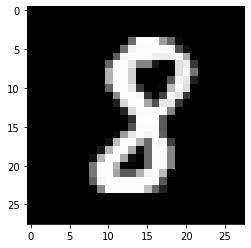

(28, 28) 28
(28, 28) 28
(28, 28) 28


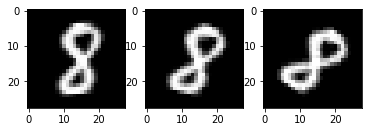

In [21]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us augment the whole dataset and see if this improves the test accuracy

In [9]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
print(len(train_X))
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))
print(augdata.shape,train_X.data)

50


NameError: ignored

In [32]:
a=np.array([1,2,3,4])
b=a
b.fill(55)
a,b

(array([55, 55, 55, 55]), array([55, 55, 55, 55]))

In [25]:
train_X.shape,augdata.shape

((50, 28, 28), (300, 28, 28))

In [ ]:
len((33,2,1))
len(train_X)
a=np.arange(16).reshape(4,1,2,2)
len(a)

4

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint.

In [33]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentation constrained by  0  is  0.6472
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentation constrained by  10  is  0.6695
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentation constrained by  20  is  0.6778
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentation constrained by  30  is  0.6743
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentation constrained by  40  is  0.6764
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentation constrained by  50  is  0.6681
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
(50, 28, 28) 50
Accuracy after rotation augmentat

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

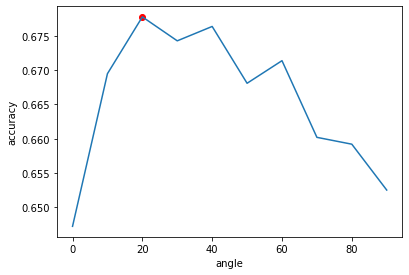

In [38]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us try one more augmentation: shear. Here is what this looks like:

In [41]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

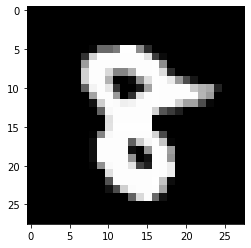

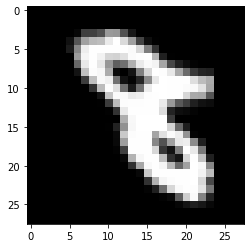

In [42]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

Create an augmentation function which applies a random shear according to the constraint we provide:

In [43]:
def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

Let us do a grid search to find the best shear constraint.

In [44]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6183
Accuracy after shear augmentation constrained by  0.4  is  0.63
Accuracy after shear augmentation constrained by  0.6  is  0.6419
Accuracy after shear augmentation constrained by  0.8  is  0.645
Accuracy after shear augmentation constrained by  1.0  is  0.6422
Accuracy after shear augmentation constrained by  1.2  is  0.6459
Accuracy after shear augmentation constrained by  1.4  is  0.6361
Accuracy after shear augmentation constrained by  1.6  is  0.6405
Accuracy after shear augmentation constrained by  1.8  is  0.6163
Accuracy after shear augmentation constrained by  2.0  is  0.6259


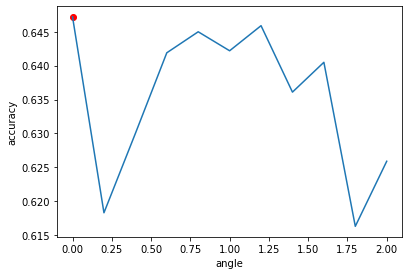

In [45]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters. 

In [39]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters. 

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

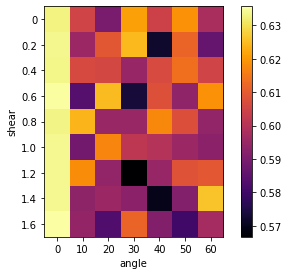

In [48]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno') 
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

In [ ]:
a=set([1,2,3,4])
a.remove(1)
if 2 in a:
  print(a)

{2, 3, 4}


It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them. 
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch. 

In [ ]:
def Translate(data,x,y):
  samp_data = data.copy()
  # for i in range((samp_data.shape[0])):
  s=rng.random(len(samp_data))
  s=s-0.5
  for j in range(len(s)):
    trans = AffineTransform(translation=(s[j]*x,s[j]*y))
    samp_data[j] = warp(data[j],trans,mode='wrap')
    # print(samp_data)
  return samp_data

Translate(train_X,12,10)

In [52]:
translation_list = [(0,0),(10,0),(0,10),(10,10),(20,0),(0,20),(20,20)]
auglabel = train_y
augdata = train_X
naugmentations=5
accur=[]
for p in range(len(translation_list)):
  x,y = translation_list[p]
  augdata = train_X.copy()
  auglabel = train_y.copy()
  for q in range(naugmentations):
    augdata = np.concatenate((augdata,Translate(train_X,x,y)))
    auglabel = np.concatenate((auglabel,train_y))
  pred = NN(augdata,auglabel,test_X)
  acc= Accuracy(test_y,pred)
  print("Accuracy for "+str(translation_list[p])+' translation: '+str(acc))
  accur.append(acc)

# augdata.shap

Accuracy for (0, 0) translation: 0.6472
Accuracy for (10, 0) translation: 0.6291
Accuracy for (0, 10) translation: 0.6428
Accuracy for (10, 10) translation: 0.6228
Accuracy for (20, 0) translation: 0.6284
Accuracy for (0, 20) translation: 0.6117
Accuracy for (20, 20) translation: 0.6337


In [47]:
p=np.array(translation_list)

# plt.plot(translation_list[:],accur)

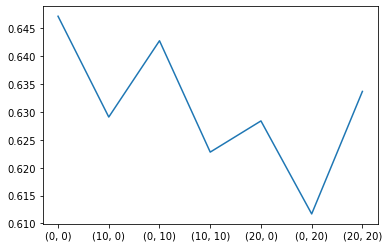

In [53]:
for x in range(len(translation_list)):
  translation_list[x]=str(translation_list[x])

plt.plot(translation_list,accur)

In [58]:
from skimage.filters import gaussian

def blurr(data,x):
  samp_data = data.copy()
  s=rng.random(len(samp_data))
  s=s-0.5
  for j in range(len(s)):
    samp_data[j] = gaussian(data[j],sigma=x)
  return samp_data



In [59]:
sigma = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
auglabel = train_y
augdata = train_X
naugmentations=5
accur=[]
for p in range(len(sigma)):
  augdata = train_X.copy()
  auglabel = train_y.copy()
  for q in range(naugmentations):
    augdata = np.concatenate((augdata,blurr(train_X,p)))
    auglabel = np.concatenate((auglabel,train_y))
  pred = NN(augdata,auglabel,test_X)
  acc= Accuracy(test_y,pred)
  print("Accuracy for sigma "+str(sigma[p])+' : '+str(acc))
  accur.append(acc)

Accuracy for sigma 0 : 0.6472
Accuracy for sigma 0.1 : 0.6942
Accuracy for sigma 0.2 : 0.7022
Accuracy for sigma 0.3 : 0.6603
Accuracy for sigma 0.4 : 0.6032
Accuracy for sigma 0.5 : 0.5655
Accuracy for sigma 0.6 : 0.5555
Accuracy for sigma 0.7 : 0.558
Accuracy for sigma 0.8 : 0.5651
Accuracy for sigma 0.9 : 0.5759
Accuracy for sigma 1 : 0.5872


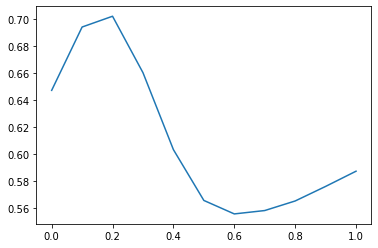

In [60]:
plt.plot(sigma,accur)

In [64]:
accur=[]
translation_list = [(0,0),(10,0),(0,10),(10,10),(20,0),(0,20),(20,20)]
nagumentations=5
for p in range(len(sigma)):
  augdata = train_X.copy()
  auglabel = train_y.copy()
  for r in range(nagumentations):
    augdata = np.concatenate((augdata,blurr(train_X,p)))
    auglabel = np.concatenate((auglabel,train_y))
  for q in range(len(translation_list)):
    x,y = translation_list[q]
    for r in range(naugmentations):
      augdata = np.concatenate((augdata,Translate(train_X,x,y)))
      auglabel = np.concatenate((auglabel,train_y))
    pred = NN(augdata,auglabel,test_X)
    acc= Accuracy(test_y,pred)
    print('Accuracy for sigma:'+str(sigma[p])+' and translation of (x,y) cordinates by '+str(translation_list[q])+': '+str(acc))
    accur.append(acc)


Accuracy for sigma:0 and translation of (x,y) cordinates by (0, 0): 0.6472
Accuracy for sigma:0 and translation of (x,y) cordinates by (10, 0): 0.634
Accuracy for sigma:0 and translation of (x,y) cordinates by (0, 10): 0.6434
Accuracy for sigma:0 and translation of (x,y) cordinates by (10, 10): 0.6644
Accuracy for sigma:0 and translation of (x,y) cordinates by (20, 0): 0.6697
Accuracy for sigma:0 and translation of (x,y) cordinates by (0, 20): 0.6688
Accuracy for sigma:0 and translation of (x,y) cordinates by (20, 20): 0.6717
Accuracy for sigma:0.1 and translation of (x,y) cordinates by (0, 0): 0.6942
Accuracy for sigma:0.1 and translation of (x,y) cordinates by (10, 0): 0.691
Accuracy for sigma:0.1 and translation of (x,y) cordinates by (0, 10): 0.6939
Accuracy for sigma:0.1 and translation of (x,y) cordinates by (10, 10): 0.6909
Accuracy for sigma:0.1 and translation of (x,y) cordinates by (20, 0): 0.6907
Accuracy for sigma:0.1 and translation of (x,y) cordinates by (0, 20): 0.6912
A

KeyboardInterrupt: ignored